In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
cell = pd.read_csv('./data/samsung_stock.csv')
cell

,거래일,최고가,최저가,시작가,종가,거래량,수정종가
0,2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12810.791016
1,2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13016.647461
2,2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13317.520508
3,2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,12874.129883
4,2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13000.812500
...,...,...,...,...,...,...,...
3092,2022-08-12,60700.0,59400.0,59500.0,60200.0,10786658.0,60200.000000
3093,2022-08-16,61600.0,60300.0,60500.0,61000.0,15036727.0,61000.000000
3094,2022-08-17,61200.0,60300.0,61100.0,60400.0,9061518.0,60400.000000
3095,2022-08-18,61900.0,60000.0,60300.0,61500.0,16372754.0,61500.000000


### 증가 금액에 대한 그래프 색을 검정색으로 해서 그린다.
- x축은 일자, y축은 그래프로 처리한다.
- 데이터 프레임이나 시리즈의 인덱스가 x축이 된다.

In [6]:
# 거래일을 인덱스로 지정한다.
cell2 = cell.set_index('거래일')
cell2

,최고가,최저가,시작가,종가,거래량,수정종가
거래일,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12810.791016
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13016.647461
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13317.520508
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,12874.129883
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13000.812500
...,...,...,...,...,...,...
2022-08-12,60700.0,59400.0,59500.0,60200.0,10786658.0,60200.000000
2022-08-16,61600.0,60300.0,60500.0,61000.0,15036727.0,61000.000000
2022-08-17,61200.0,60300.0,61100.0,60400.0,9061518.0,60400.000000


In [55]:
# 인덱스를 날짜 타입으로 변경한다.
cell2.index = pd.to_datetime(cell2.index, format='%Y-%m-%d')

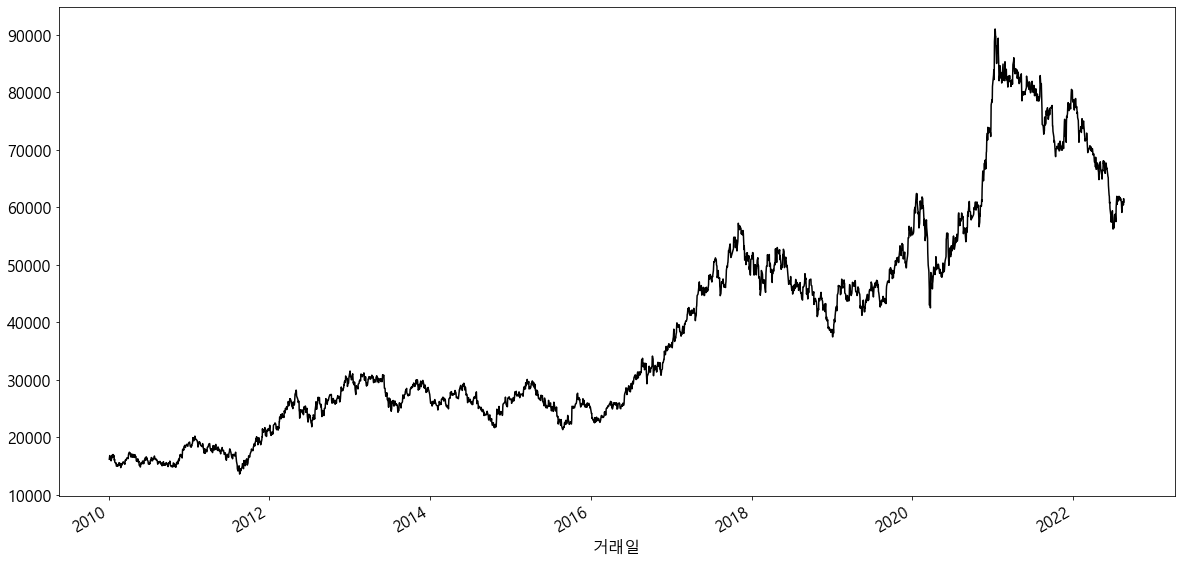

In [56]:
# Series의 인덱스가 x축이 되고, 값이 y축이 된다.
cell2['종가'].plot(color='black')
plt.show()

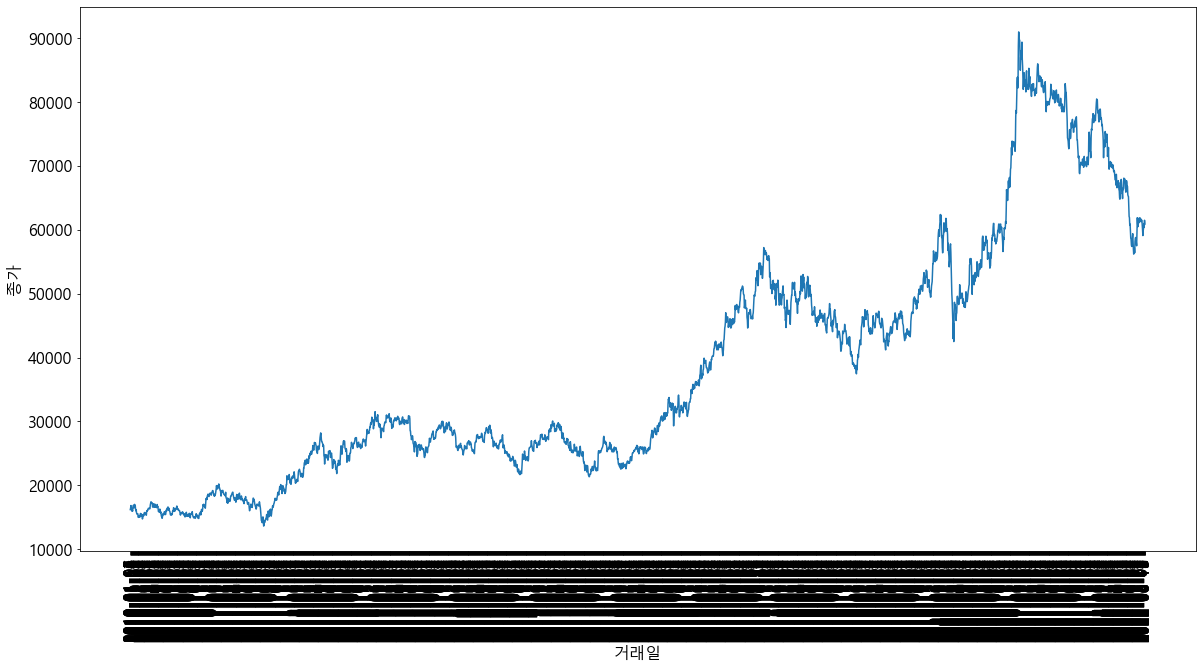

In [13]:
sns.lineplot(data=cell, x='거래일', y='종가')describeticks(rotation=90)
plt.show()

### 특정 범위를 벗어나는 그래프의 색을 다르게 표시한다.
- 하나의 별도 그래프를 그려서 별도의 모양과 색으로 처리한다.

In [57]:
# 요약 통계 정보를 가져온다.
cel_des = cell2['종가'].describe(percentiles=[0.1, 0.9])
cel_des

count     3097.000000
mean     38339.383274
std      18875.341102
min      13600.000000
10%      17312.000000
50%      29940.000000
90%      69540.000000
max      91000.000000
Name: 종가, dtype: float64

In [58]:
print(cel_des['10%'])
print(cel_des['90%'])

17312.0
69540.00000000001


In [59]:
# 요약 통계 정보에서 10% 위치값을 가져온다.
a1 = cel_des['10%']
# 요약 통계 정보에서 90% 위치값을 가져온다.
a2 = cel_des['90%']

a3 = cell2.query('종가 <= @a1 or 종가 >= @a2')
a3

,최고가,최저가,시작가,종가,거래량,수정종가
거래일,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12810.791016
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13016.647461
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13317.520508
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,12874.129883
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13000.812500
...,...,...,...,...,...,...
2022-03-25,70200.0,69600.0,70100.0,69800.0,12986010.0,69019.031250
2022-03-28,69900.0,69200.0,69500.0,69700.0,12619289.0,68920.148438
2022-03-29,70300.0,69800.0,70000.0,70200.0,13686208.0,69414.554688


In [60]:
# 종가만 추출한다.
cel_top_bottom = a3['종가']
cel_top_bottom

거래일
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2022-03-25    69800.0
2022-03-28    69700.0
2022-03-29    70200.0
2022-03-30    69900.0
2022-03-31    69600.0
Name: 종가, Length: 620, dtype: float64

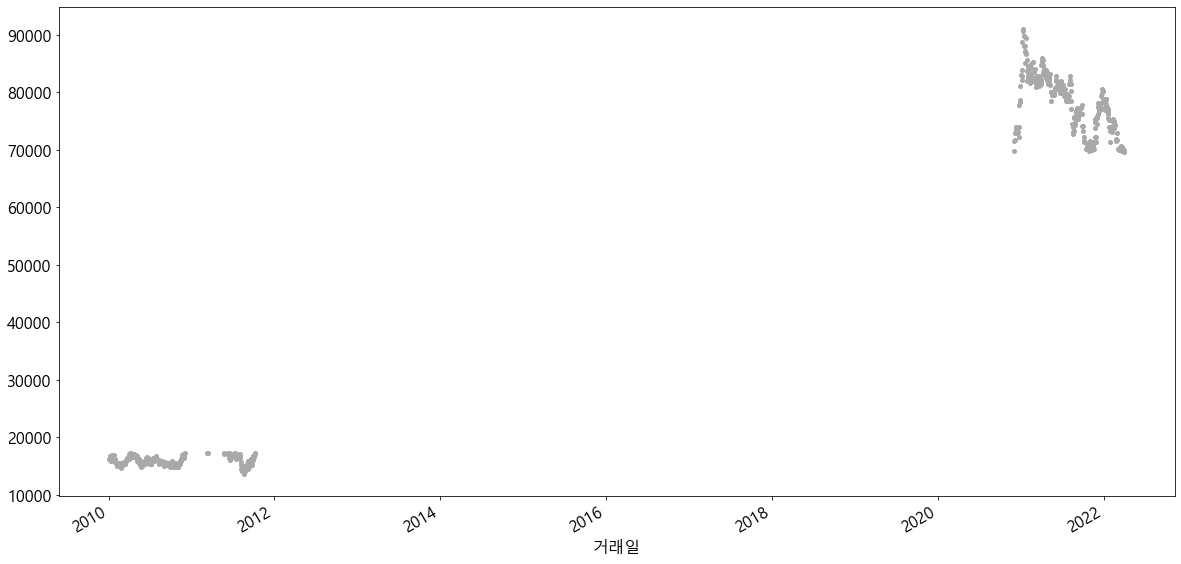

In [61]:
# style : 선의 모양. ' '를 주면 선의 모양은 빈칸이 된다.
# marker : 값 위치에 표시활 모양. o는 점
# ms : 마커 크기
# color : 색상
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='darkgray')
plt.show()

### 그래프내에 강조선 그리기
- 상위 90%와 하위 10% 위치에 선을 그린다.

In [62]:
# 10% 위치 값
value_10 = cel_des['10%']
value_90 = cel_des['90%']

print(value_10)
print(value_90)

17312.0
69540.00000000001


In [63]:
# 제일 처음 날짜
index_min = cell2.index[0]
# 제일 마지막 날짜
index_max = cell2.index[-1]

print(index_min)
print(index_max)

2010-01-04 00:00:00
2022-08-19 00:00:00


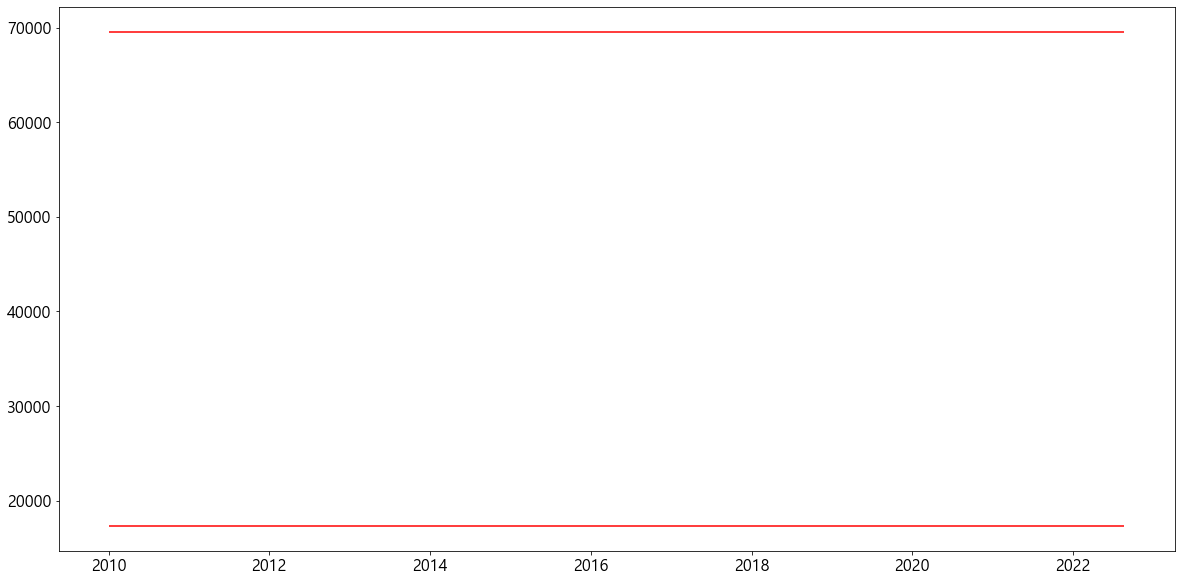

In [64]:
# 선을 그린다.
plt.hlines(y = [value_10, value_90], xmin=index_min, xmax=index_max, color='red')
plt.show()

### 위의 세가지를 한번에 그린다.

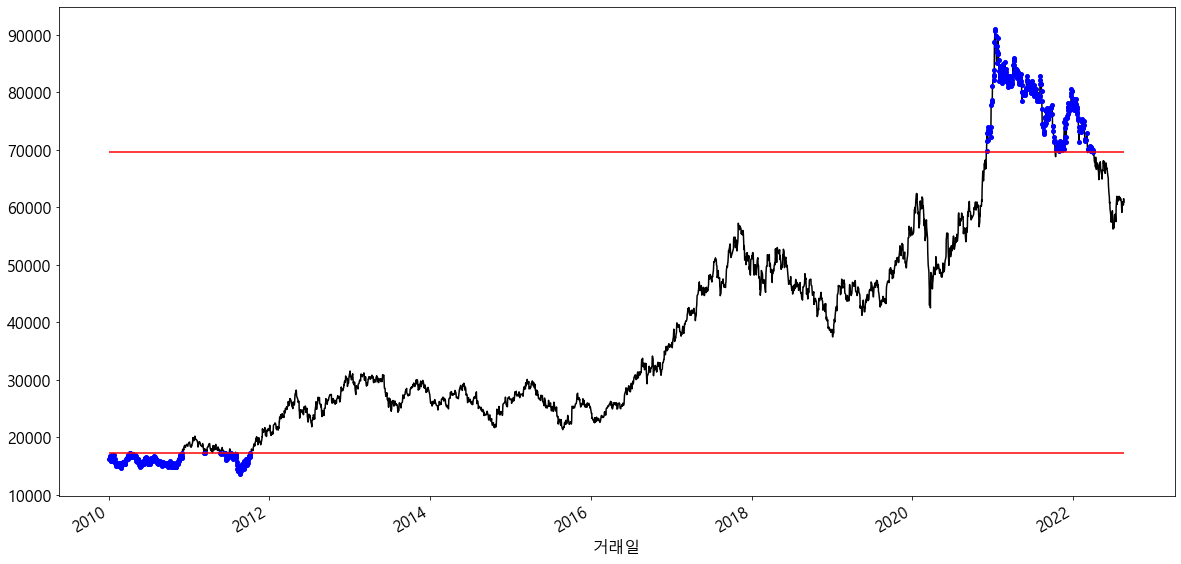

In [66]:
# 전체 종가 그래프를 그린다
cell2['종가'].plot(color='black')
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='blue')
plt.hlines(y=[value_10, value_90], xmin=index_min, xmax=index_max, color='red')
plt.show()